## RESAMPLING

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1

Question 1 Using the full crime data set, compute an estimation of the mean squared error (MSE) for a DecisionTreeRegressor with different values of the min_samples_split parameter, using a 5 fold cross-validation.

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [42]:
df = pd.read_csv('crimes.csv')
print(df)

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  

In [43]:
#assigning values to the dataset

df2 = df.drop(labels='ViolentCrimesPerPop', axis=1, inplace=False)
x = df2
y = df.loc[:, 'ViolentCrimesPerPop']

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
#creating the default regressor and fitting the training data to it

regressor = DecisionTreeRegressor()
regressor.fit(x, y)

DecisionTreeRegressor()

In [46]:
#creating a 5-fold cross-validation object

cv_folds = KFold(n_splits=5, shuffle=True, random_state=0)
regressor_cv_score = cross_val_score(regressor, x, y, cv=cv_folds)

In [47]:
#specifying the values of min_samples_split to be tested

min_samples_split_values = [50, 150, 200, 250, 300]

In [48]:
#performing cross-validation for each value of min_samples_split

mse_means = []
mse_std_errors = []

for min_samples_split in min_samples_split_values:
    regressor.min_samples_split = min_samples_split
    mse_scores = cross_val_score(regressor, x, y, cv=cv_folds, scoring='neg_mean_squared_error')
    mse_mean = -mse_scores.mean()
    mse_std_error = mse_scores.std()
    
    mse_means.append(mse_mean)
    mse_std_errors.append(mse_std_error)
    
    print(f"min_samples_split = {min_samples_split}, Mean Squared Error: {mse_mean:.4f}")

min_samples_split = 50, Mean Squared Error: 0.0272
min_samples_split = 150, Mean Squared Error: 0.0241
min_samples_split = 200, Mean Squared Error: 0.0244
min_samples_split = 250, Mean Squared Error: 0.0249
min_samples_split = 300, Mean Squared Error: 0.0255


Question 2 Plot the resulting estimates as a function of the min_samples_split parameter
showing on the representation the standard error of the CV estimate (for instance using seaborn).

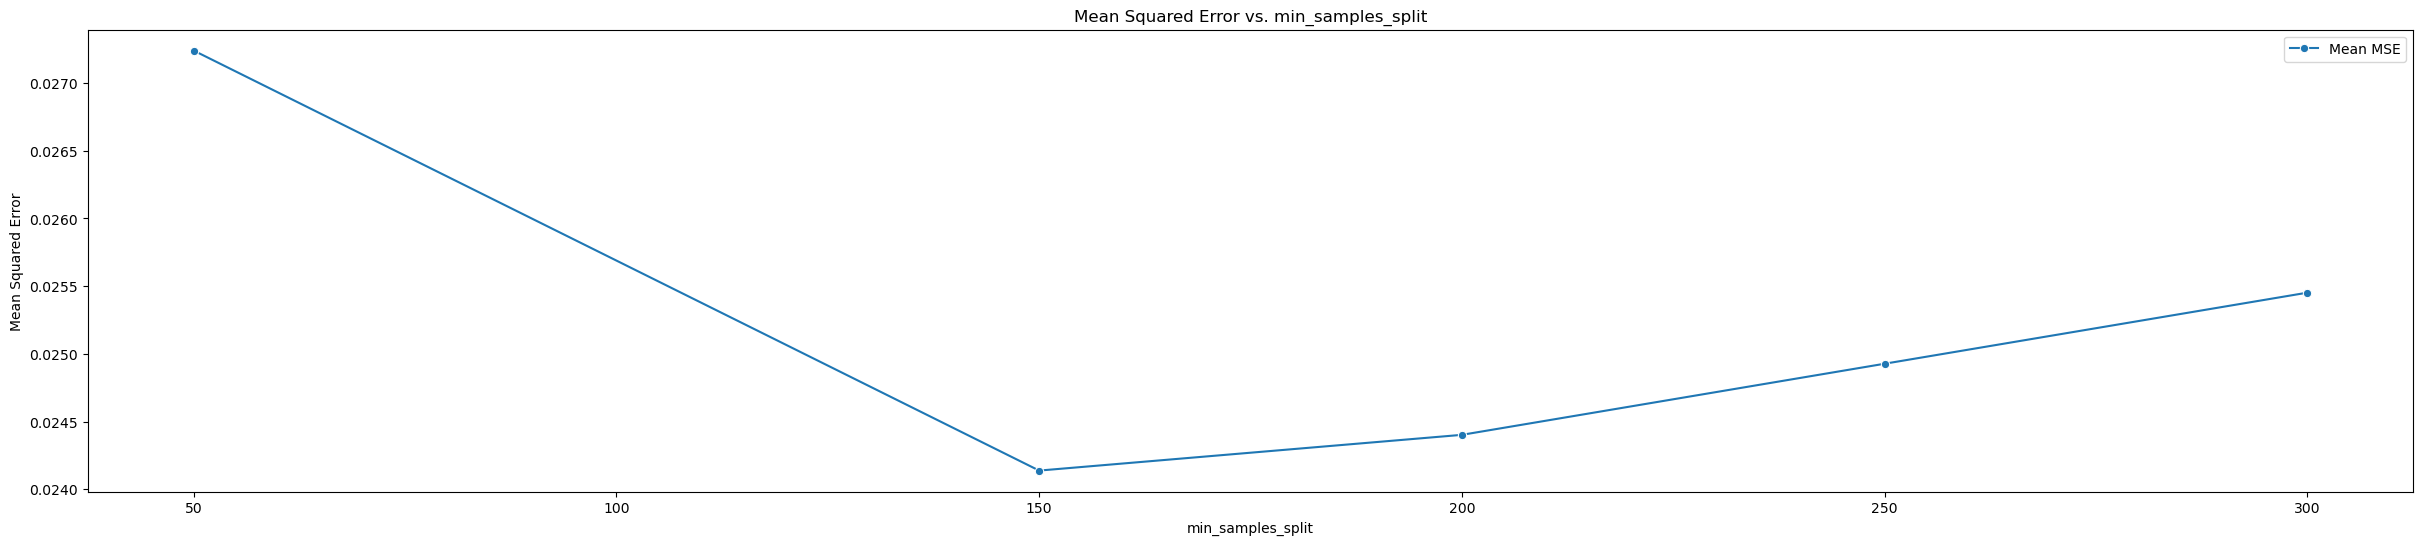

In [49]:
#plotting the results

plt.figure(figsize=(30, 6))
sns.lineplot(x=min_samples_split_values, y=mse_means, marker='o', label='Mean MSE')
plt.title('Mean Squared Error vs. min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

#MSE-lowest for 150 splits

Question 3 Compare the results to the ones obtained by a split sample approach where one first
splits the data set into a learning set and a validation set (keep 20 % of the data for validation)
and then fits different models on the learning set and computes their mean squared error on the
validation set.

In [50]:
#splitting the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)

In [51]:
#creating the default regressor and fitting the training data to it

regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [53]:
#making predictions on the testing data

y_pred = regressor.predict(x_test)

In [54]:
mse_train = []
mse_test = []

#Defining a range of min_samples_split values to test

min_samples_split_range = range(50, 300)

for min_samples_split in min_samples_split_range:
    regressor = DecisionTreeRegressor(min_samples_split = min_samples_split)
    regressor.fit(x_train, y_train)

    y_train_pred = regressor.predict(x_train)
    y_test_pred = regressor.predict(x_test)

    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

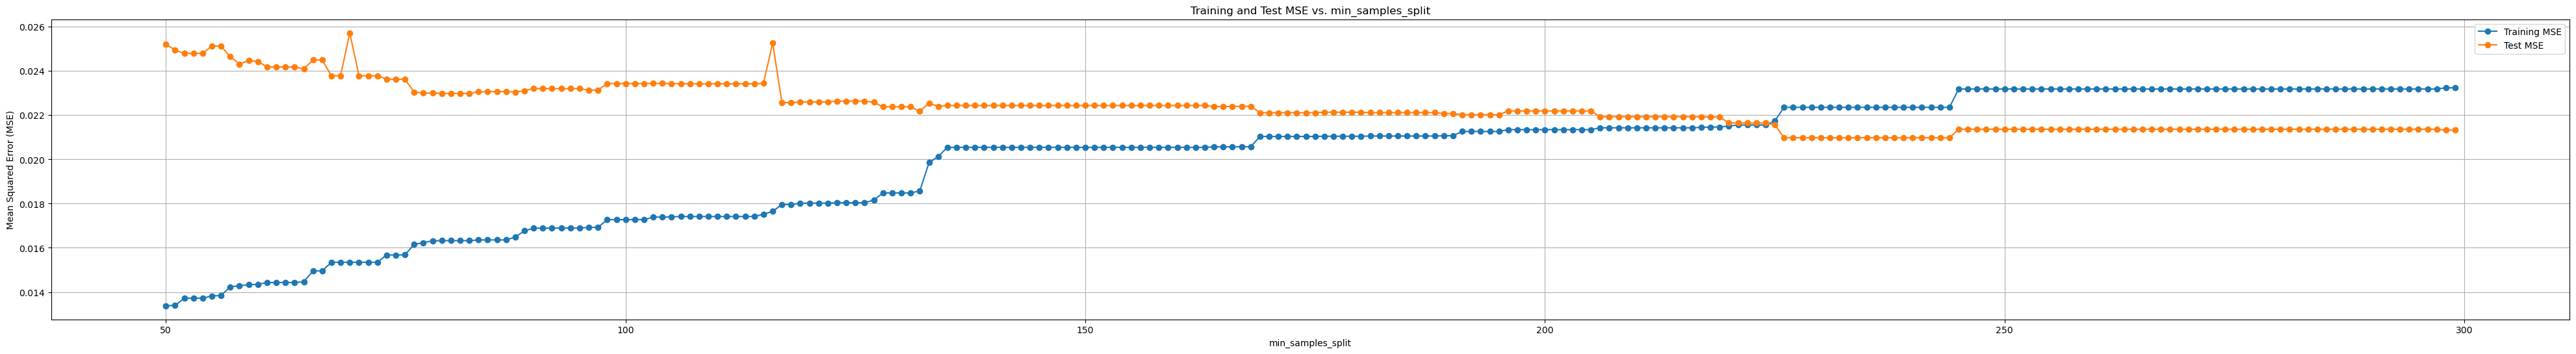

In [55]:
#Graphical representation of the corresponding curves

plt.figure(figsize =(50, 6))
plt.plot(min_samples_split_range, mse_train, label='Training MSE', marker='o')
plt.plot(min_samples_split_range, mse_test, label='Test MSE', marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Test MSE vs. min_samples_split')
plt.legend()
plt.grid()
plt.show()

Split Sample data set - Mean Squared error is least around 240 (approximately) before it rises and stabilises.

Question 4 Compare in an informal way the stability of the results of both approaches (using
different values of random_state for instance).

In [56]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.tree import DecisionTreeRegressor

min_samples_split_value = 5

#Decision Tree Regressor with the fixed min_samples_split
dt_regressor = DecisionTreeRegressor(min_samples_split=min_samples_split_value)

#loop to calculate MSE using 5-fold cross-validation
def calculate_cv_mse(x, y):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = -cross_val_score(dt_regressor, x, y, cv=kfold, scoring='neg_mean_squared_error')
    return mse_scores

#loop to calculate MSE using random split samples
def calculate_random_split_mse(x, y):
    mse_scores = []
    for i in range(5):  # You can choose the number of repetitions
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
        dt_regressor.fit(x_train, y_train)
        y_pred = dt_regressor.predict(x_test)
        mse = np.mean((y_test - y_pred)**2)
        mse_scores.append(mse)
    return mse_scores


#Calculating MSE using 5-fold cross-validation
cv_mse_scores = calculate_cv_mse(x_test, y_test)

#Calculating MSE using random split samples
random_split_mse_scores = calculate_random_split_mse(x_test, y_test)

print(f"Cross Validation MSE Score = {cv_mse_scores}, Random Split MSE Score: {random_split_mse_scores}")


Cross Validation MSE Score = [0.04623994 0.03659238 0.03173295 0.03474613 0.04460597], Random Split MSE Score: [0.03395967592592593, 0.033603848379629625, 0.03305059027777778, 0.0331491261574074, 0.03321483796296296]


<Figure size 1000x600 with 0 Axes>

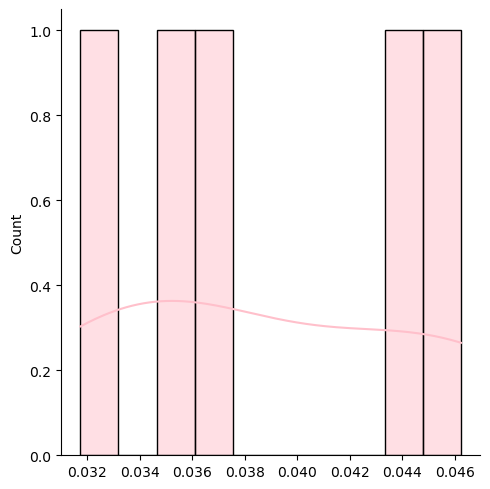

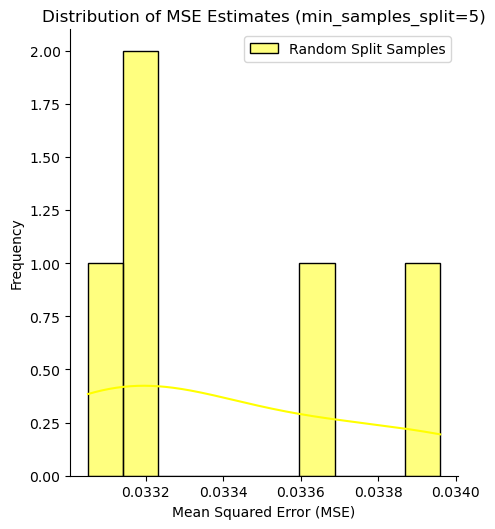

In [57]:
#Plotting the distribution of MSE estimates
plt.figure(figsize=(10, 6))
sns.displot(cv_mse_scores, label='5-Fold CV', kde=True, color='pink', bins=10)
sns.displot(random_split_mse_scores, label='Random Split Samples', kde=True, color='yellow', bins=10)
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.title(f'Distribution of MSE Estimates (min_samples_split={min_samples_split_value})')
plt.legend()
plt.show()

Different values of the random state changes the distribution the variables in the dataset.

Question 5 Compare formally the variability of the estimates by choosing a value for
min_samples_split (for instance 5) and by computing multiple estimates of the MSE of a
tree computed with this parameter using both 5 fold CV and random split sample. It is recommended to display the distribution of the MSE estimates for both approaches (this can be done
with the displot function of seaborn, for instance). Make sure to estimate the same number of
trees in both cases.

<Figure size 1000x600 with 0 Axes>

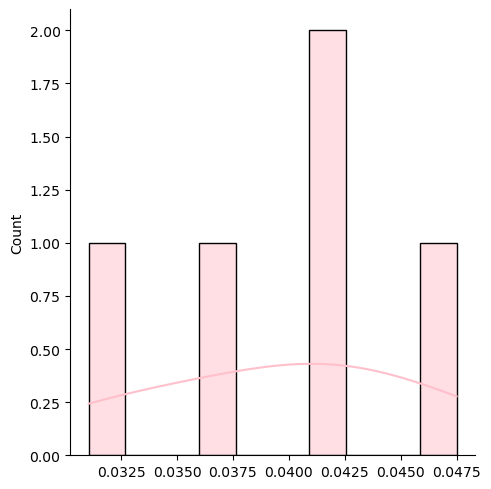

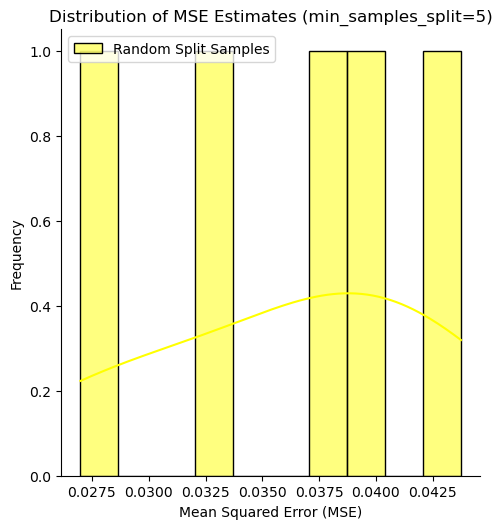

In [58]:
from sklearn.tree import DecisionTreeRegressor

#defining the fixed min_samples_split value
min_samples_split_value = 5

#Decision Tree Regressor with the fixed min_samples_split
dt_regressor = DecisionTreeRegressor(min_samples_split=min_samples_split_value)

#loop to calculate MSE using 5-fold cross-validation
def calculate_cv_mse(x, y):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = -cross_val_score(dt_regressor, x, y, cv=kfold, scoring='neg_mean_squared_error')
    return mse_scores

#loop to calculate MSE using random split samples
def calculate_random_split_mse(x, y):
    mse_scores = []
    for i in range(5):  # You can choose the number of repetitions
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        dt_regressor.fit(x_train, y_train)
        y_pred = dt_regressor.predict(x_test)
        mse = np.mean((y_test - y_pred)**2)
        mse_scores.append(mse)
    return mse_scores

##the random states here are not changed from their default values

#Calculating MSE using 5-fold cross-validation
cv_mse_scores = calculate_cv_mse(x_test, y_test)

#Calculating MSE using random split samples
random_split_mse_scores = calculate_random_split_mse(x_test, y_test)

#Plotting the distribution of MSE estimates
plt.figure(figsize=(10, 6))
sns.displot(cv_mse_scores, label='5-Fold CV', kde=True, color='pink', bins=10)
sns.displot(random_split_mse_scores, label='Random Split Samples', kde=True, color='yellow', bins=10)
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.title(f'Distribution of MSE Estimates (min_samples_split={min_samples_split_value})')
plt.legend()
plt.show()

Running and rerunning the code ensure changes the distribution of the observations in the dataset.